In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from skimage.io import imread, imshow, imsave
from skimage.filters import prewitt_h,prewitt_v
from skimage.color import rgb2hsv
import scipy.misc
import scipy.ndimage
import sklearn.metrics
from sklearn.cluster import KMeans
from skimage import measure
import imageio
import cv2
import skimage.io
import os

In [84]:
df = pd.read_csv('../input/recursion-cellular-image-classification/pixel_stats.csv')
df2 = pd.read_csv("../input/recursion-cellular-image-classification/test_controls.csv")
df3 = pd.read_csv('../input/recursion-cellular-image-classification/train_controls.csv')
train = pd.read_csv('../input/recursion-cellular-image-classification/train.csv')
test = pd.read_csv('../input/recursion-cellular-image-classification/test.csv')

In [85]:
print(train.head())

          id_code experiment  plate well       sirna
0  HEPG2-01_1_B03   HEPG2-01      1  B03   sirna_250
1  HEPG2-01_1_B04   HEPG2-01      1  B04    sirna_62
2  HEPG2-01_1_B05   HEPG2-01      1  B05  sirna_1115
3  HEPG2-01_1_B06   HEPG2-01      1  B06   sirna_602
4  HEPG2-01_1_B07   HEPG2-01      1  B07   sirna_529


In [86]:
print(df.head())

            id_code experiment  plate well  site  channel       mean  \
0  HEPG2_01_1_B02_1   HEPG2-01      1  B02     1        1  71.063782   
1  HEPG2_01_1_B02_1   HEPG2-01      1  B02     1        2  32.174431   
2  HEPG2_01_1_B02_1   HEPG2-01      1  B02     1        3  61.836025   
3  HEPG2_01_1_B02_1   HEPG2-01      1  B02     1        4  56.983257   
4  HEPG2_01_1_B02_1   HEPG2-01      1  B02     1        5  91.671993   

         std  median  min  max  
0  43.146240    67.0    7  255  
1   9.384594    31.0    6   98  
2  23.377997    59.0   11  255  
3  16.011435    56.0   11  156  
4  39.221836    85.0   13  255  


In [87]:
print(df2.head())

          id_code experiment  plate well      sirna         well_type
0  HEPG2-08_1_B02   HEPG2-08      1  B02  UNTREATED  negative_control
1  HEPG2-08_1_C03   HEPG2-08      1  C03  sirna_650  positive_control
2  HEPG2-08_1_C07   HEPG2-08      1  C07  sirna_323  positive_control
3  HEPG2-08_1_C11   HEPG2-08      1  C11  sirna_810  positive_control
4  HEPG2-08_1_C15   HEPG2-08      1  C15  sirna_577  positive_control


In [88]:
print(df3.head())

          id_code experiment  plate well      sirna         well_type
0  HEPG2-01_1_B02   HEPG2-01      1  B02  UNTREATED  negative_control
1  HEPG2-01_1_C03   HEPG2-01      1  C03  sirna_852  positive_control
2  HEPG2-01_1_C07   HEPG2-01      1  C07  sirna_702  positive_control
3  HEPG2-01_1_C11   HEPG2-01      1  C11  sirna_618  positive_control
4  HEPG2-01_1_C15   HEPG2-01      1  C15  sirna_272  positive_control


In [89]:
print(test.head())

          id_code experiment  plate well
0  HEPG2-08_1_B03   HEPG2-08      1  B03
1  HEPG2-08_1_B04   HEPG2-08      1  B04
2  HEPG2-08_1_B05   HEPG2-08      1  B05
3  HEPG2-08_1_B06   HEPG2-08      1  B06
4  HEPG2-08_1_B07   HEPG2-08      1  B07


In [90]:
test_img_f = '../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png'
im = skimage.io.imread(test_img_f)
im_g = skimage.io.imread(test_img_f, as_gray=True)

#skimage.io.imshow(im)
im.dtype

dtype('uint8')

Text(0.5, 185.7539682539684, 'Width 512')

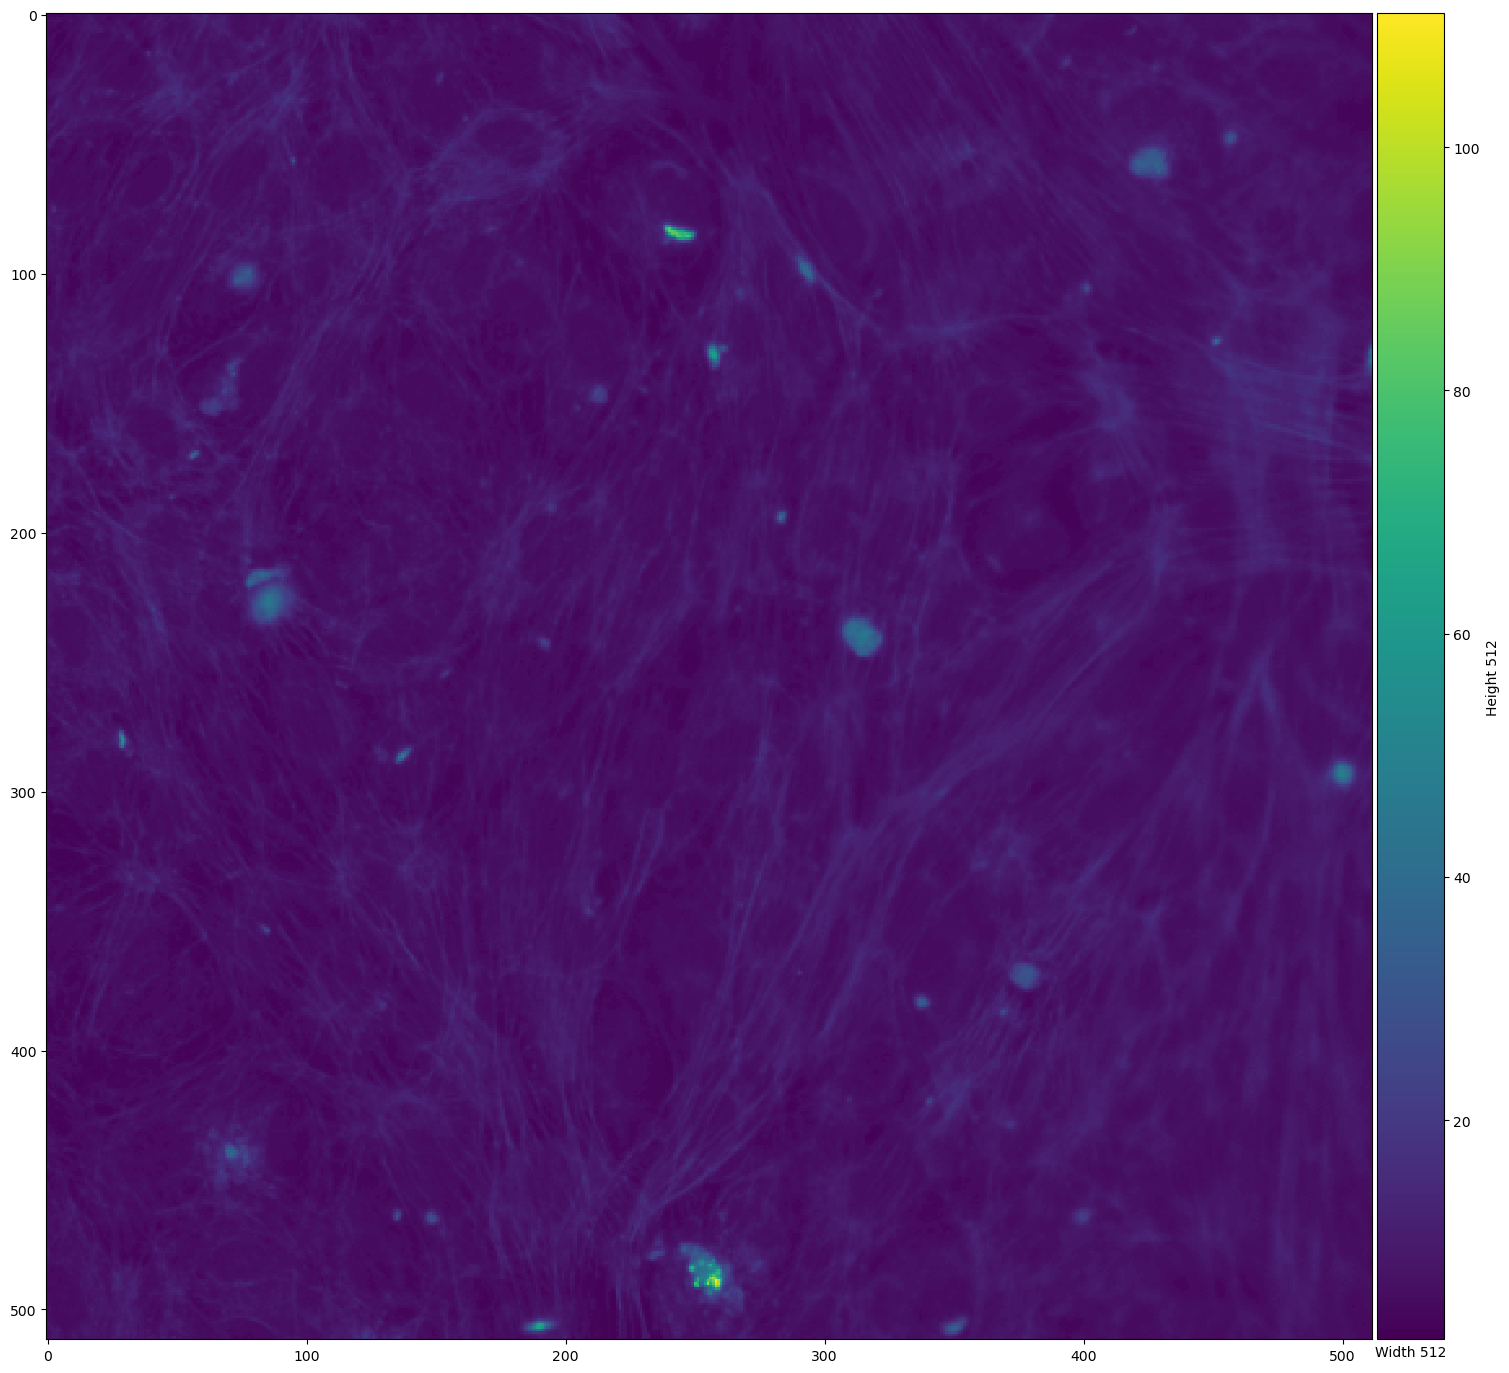

In [91]:
plt.figure(figsize=(15, 15))
image = imread('../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png', as_gray=True)
imshow(image)
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))

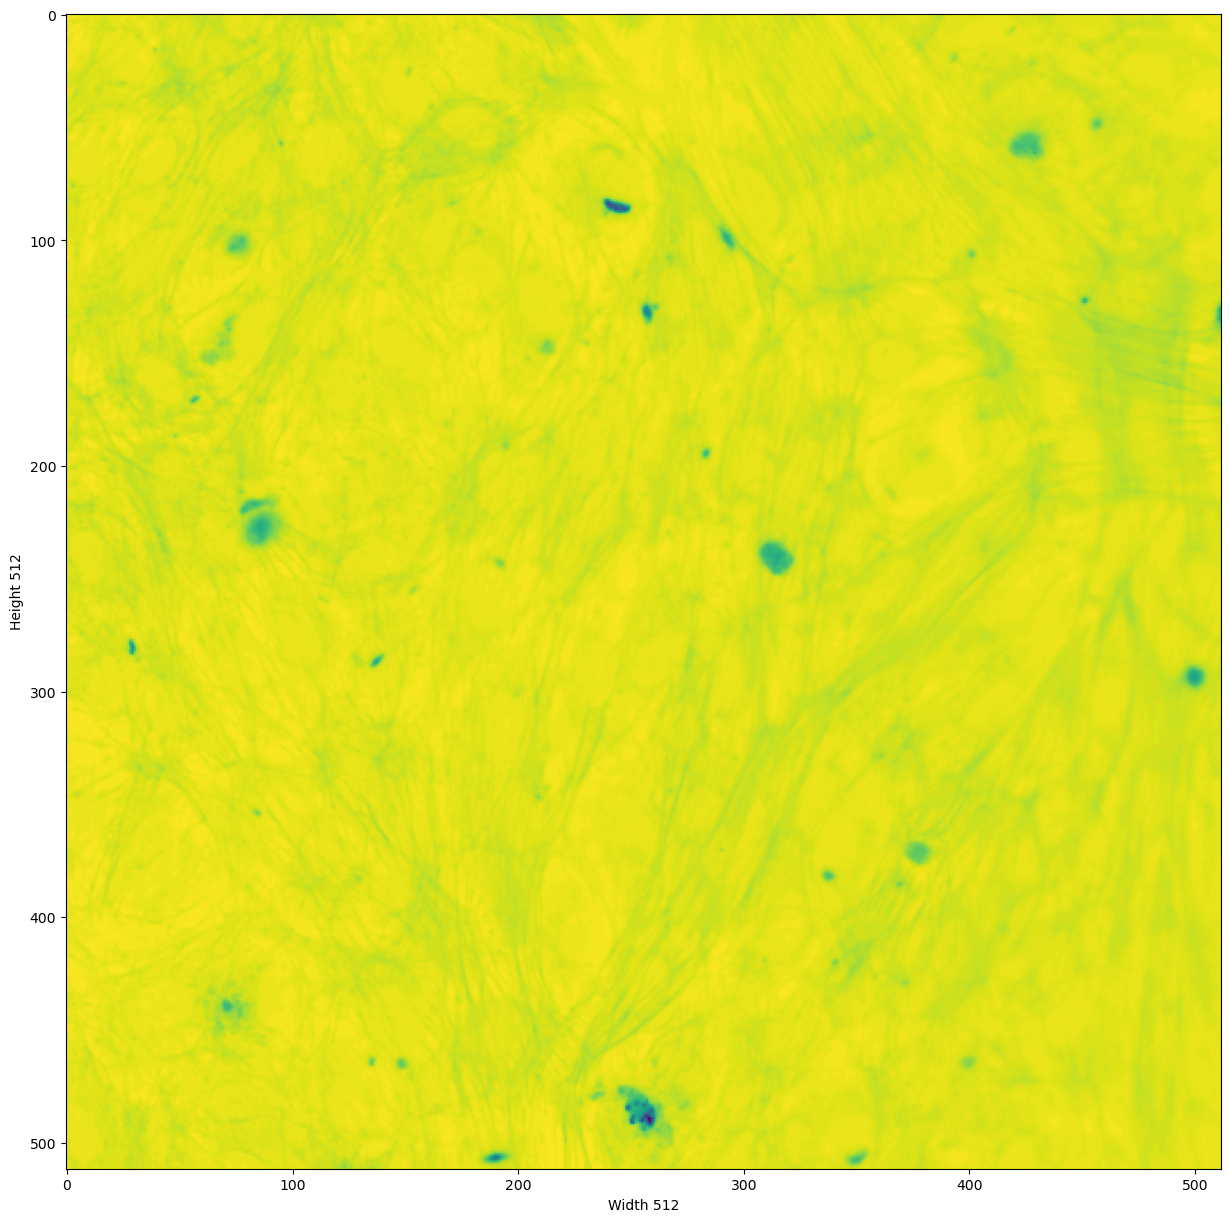

In [92]:
# Photo negative
plt.figure(figsize=(20, 15))
negative = 255 - image # neg = (L-1) - img
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(negative);

(512.0, 0.0)

<Figure size 1500x1500 with 0 Axes>

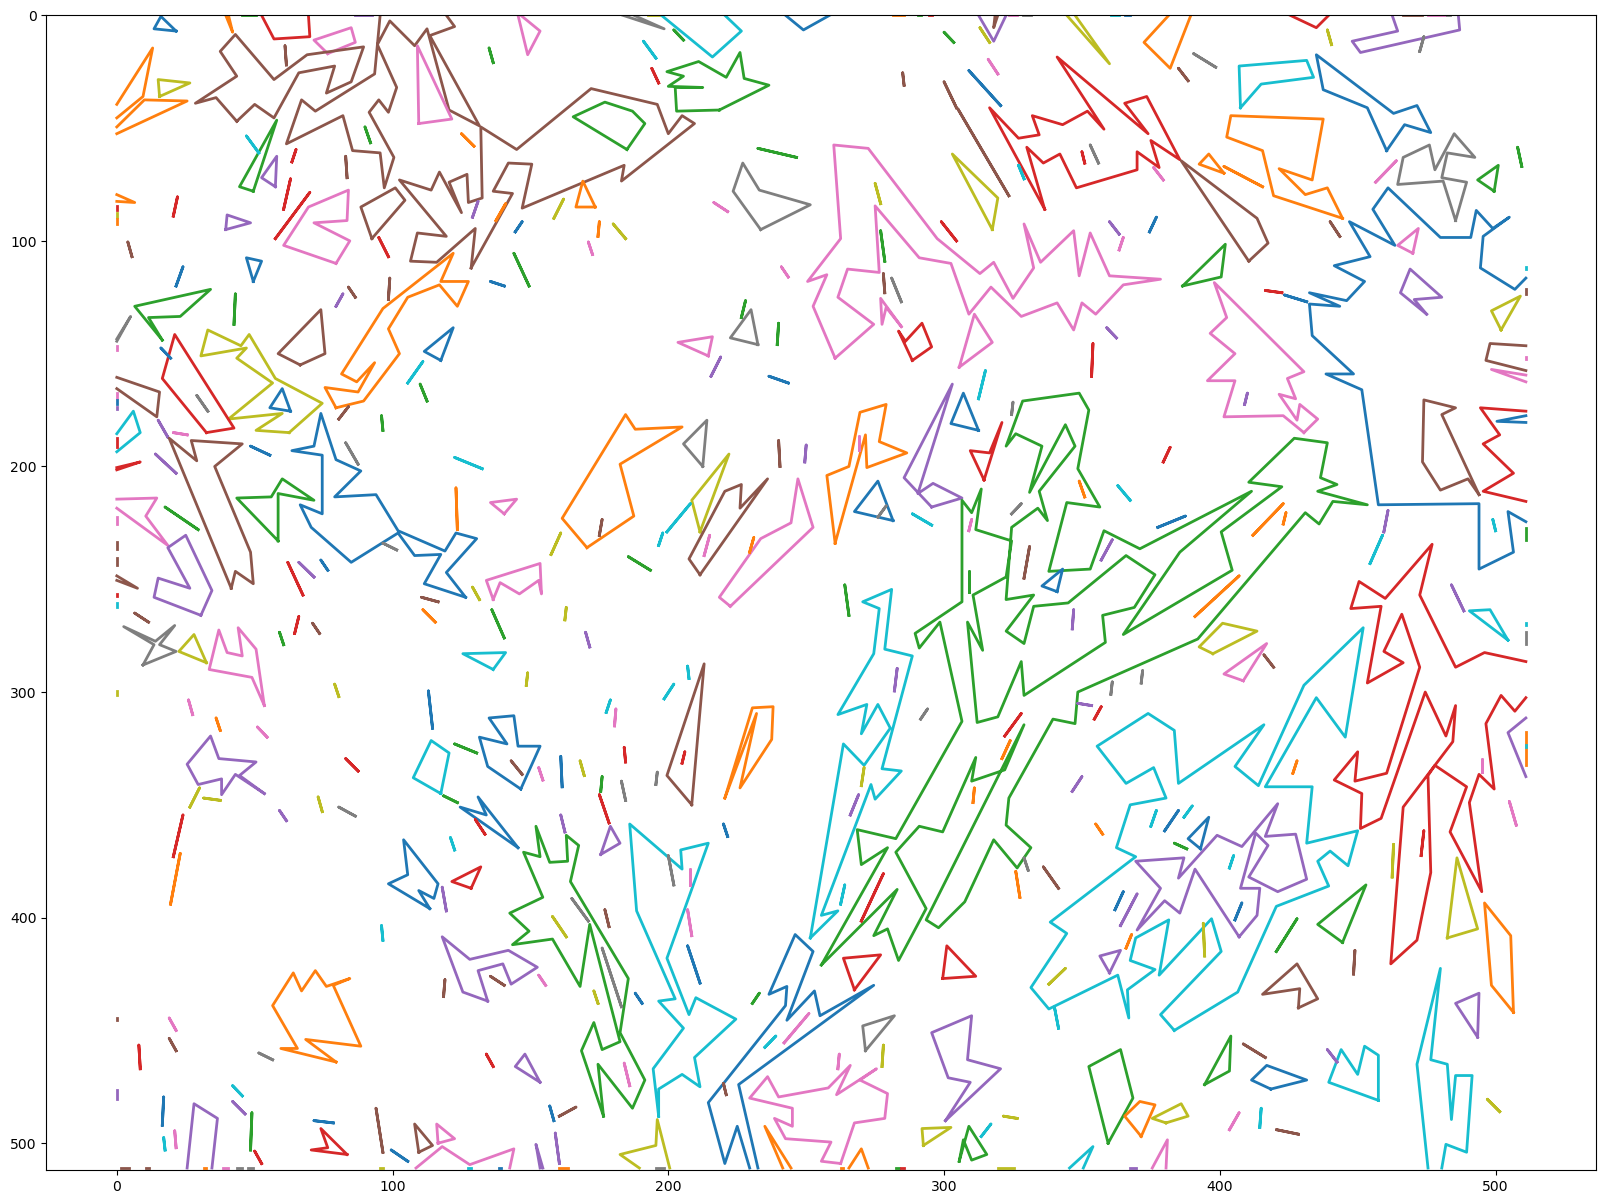

In [93]:
plt.figure(figsize=(15, 15))
pic = imageio.imread('../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png')

h,w = pic.shape[:2]

im_small_long = pic.reshape((h * w, 1))
im_small_wide = im_small_long.reshape((h,w,1))

km = KMeans(n_clusters=2)
km.fit(im_small_long)

seg = np.asarray([(1 if i == 1 else 0)
                  for i in km.labels_]).reshape((h,w))

contours = measure.find_contours(seg, 0.5, fully_connected="high")
simplified_contours = [measure.approximate_polygon(c, tolerance=5) 
                       for c in contours]

plt.figure(figsize=(20,15))
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
    
plt.ylim(h,0)

In [94]:
# Matrix 
image = imread('../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png')
image.shape, image

((512, 512),
 array([[6, 5, 4, ..., 6, 6, 6],
        [4, 4, 5, ..., 6, 6, 5],
        [5, 5, 6, ..., 5, 5, 5],
        ...,
        [5, 6, 8, ..., 5, 5, 5],
        [5, 6, 9, ..., 5, 5, 5],
        [5, 7, 9, ..., 5, 5, 5]], dtype=uint8))

In [95]:
df.values

array([['HEPG2_01_1_B02_1', 'HEPG2-01', 1, ..., 67.0, 7, 255],
       ['HEPG2_01_1_B02_1', 'HEPG2-01', 1, ..., 31.0, 6, 98],
       ['HEPG2_01_1_B02_1', 'HEPG2-01', 1, ..., 59.0, 11, 255],
       ...,
       ['U2OS_05_4_O23_2', 'U2OS-05', 4, ..., 7.0, 1, 61],
       ['U2OS_05_4_O23_2', 'U2OS-05', 4, ..., 2.0, 1, 71],
       ['U2OS_05_4_O23_2', 'U2OS-05', 4, ..., 6.0, 1, 53]], dtype=object)

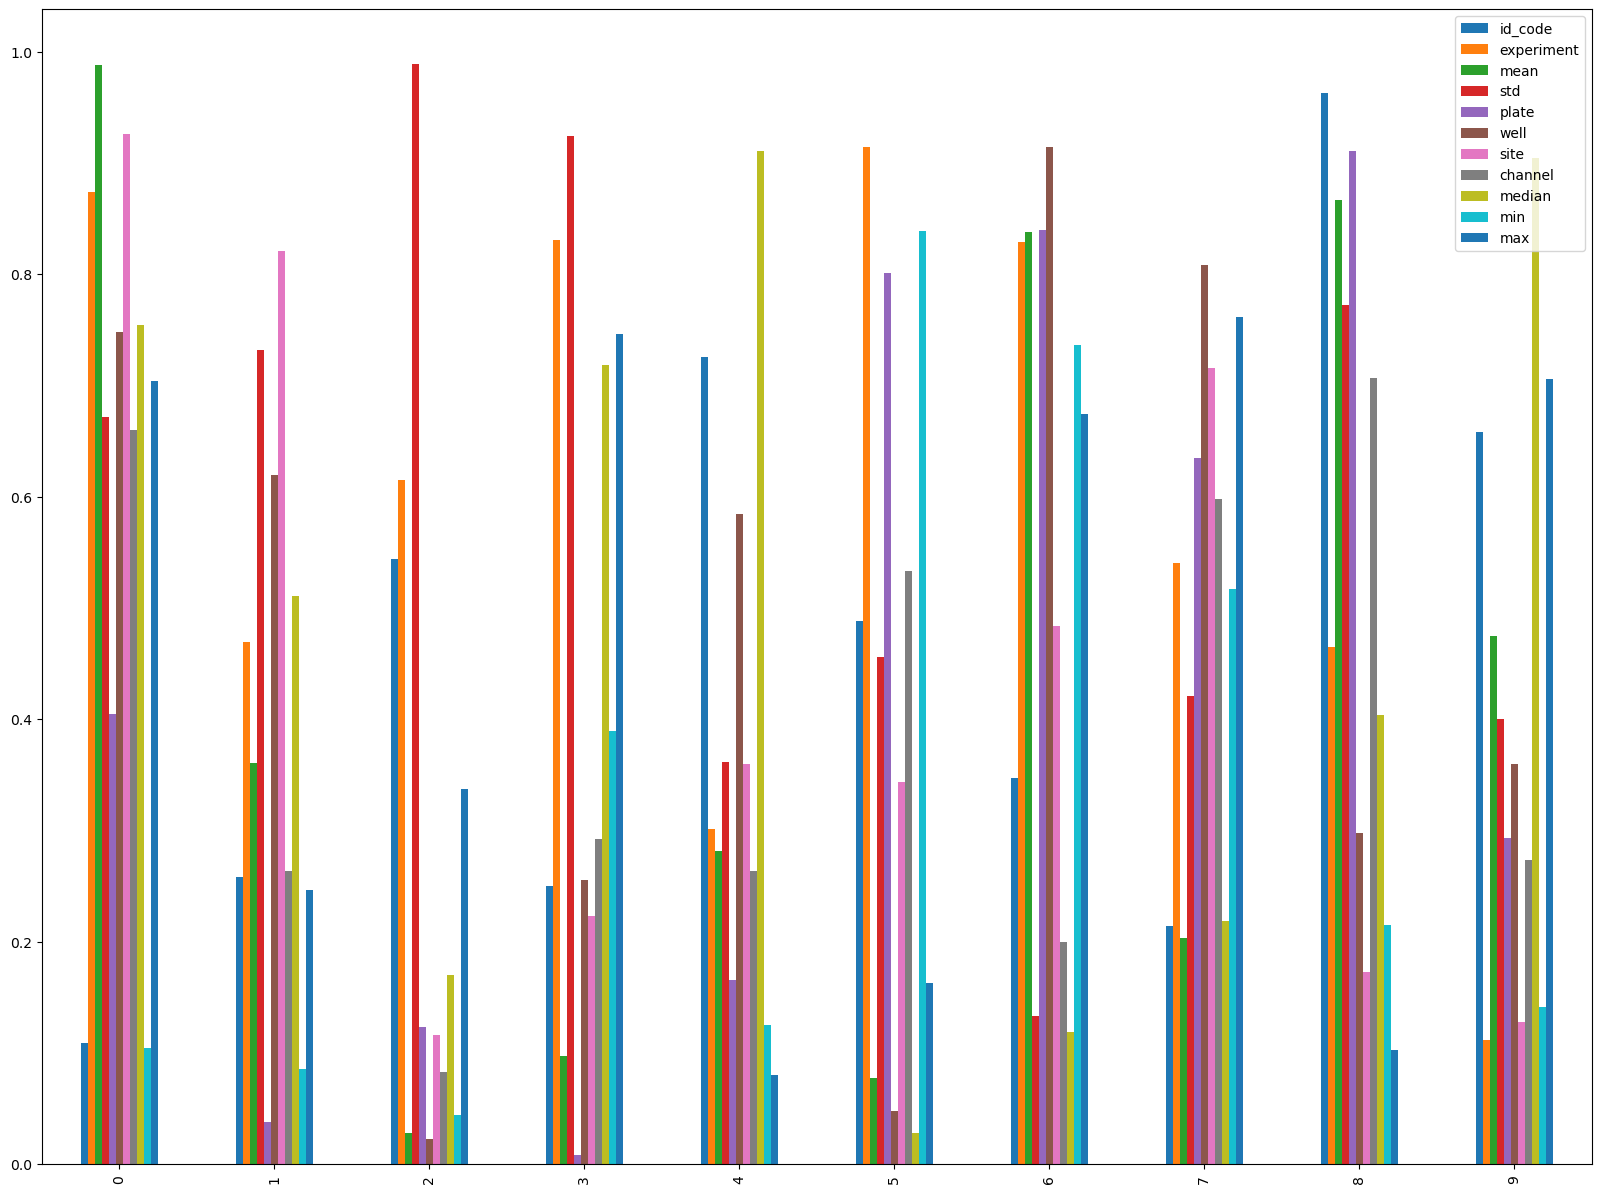

In [96]:
df2 = pd.DataFrame(np.random.rand(10, 11), columns=['id_code', 'experiment', 'mean', 'std', 'plate','well', 'site', 'channel', 'median', 'min', 'max'])
df2.plot.bar(figsize=(20,15));

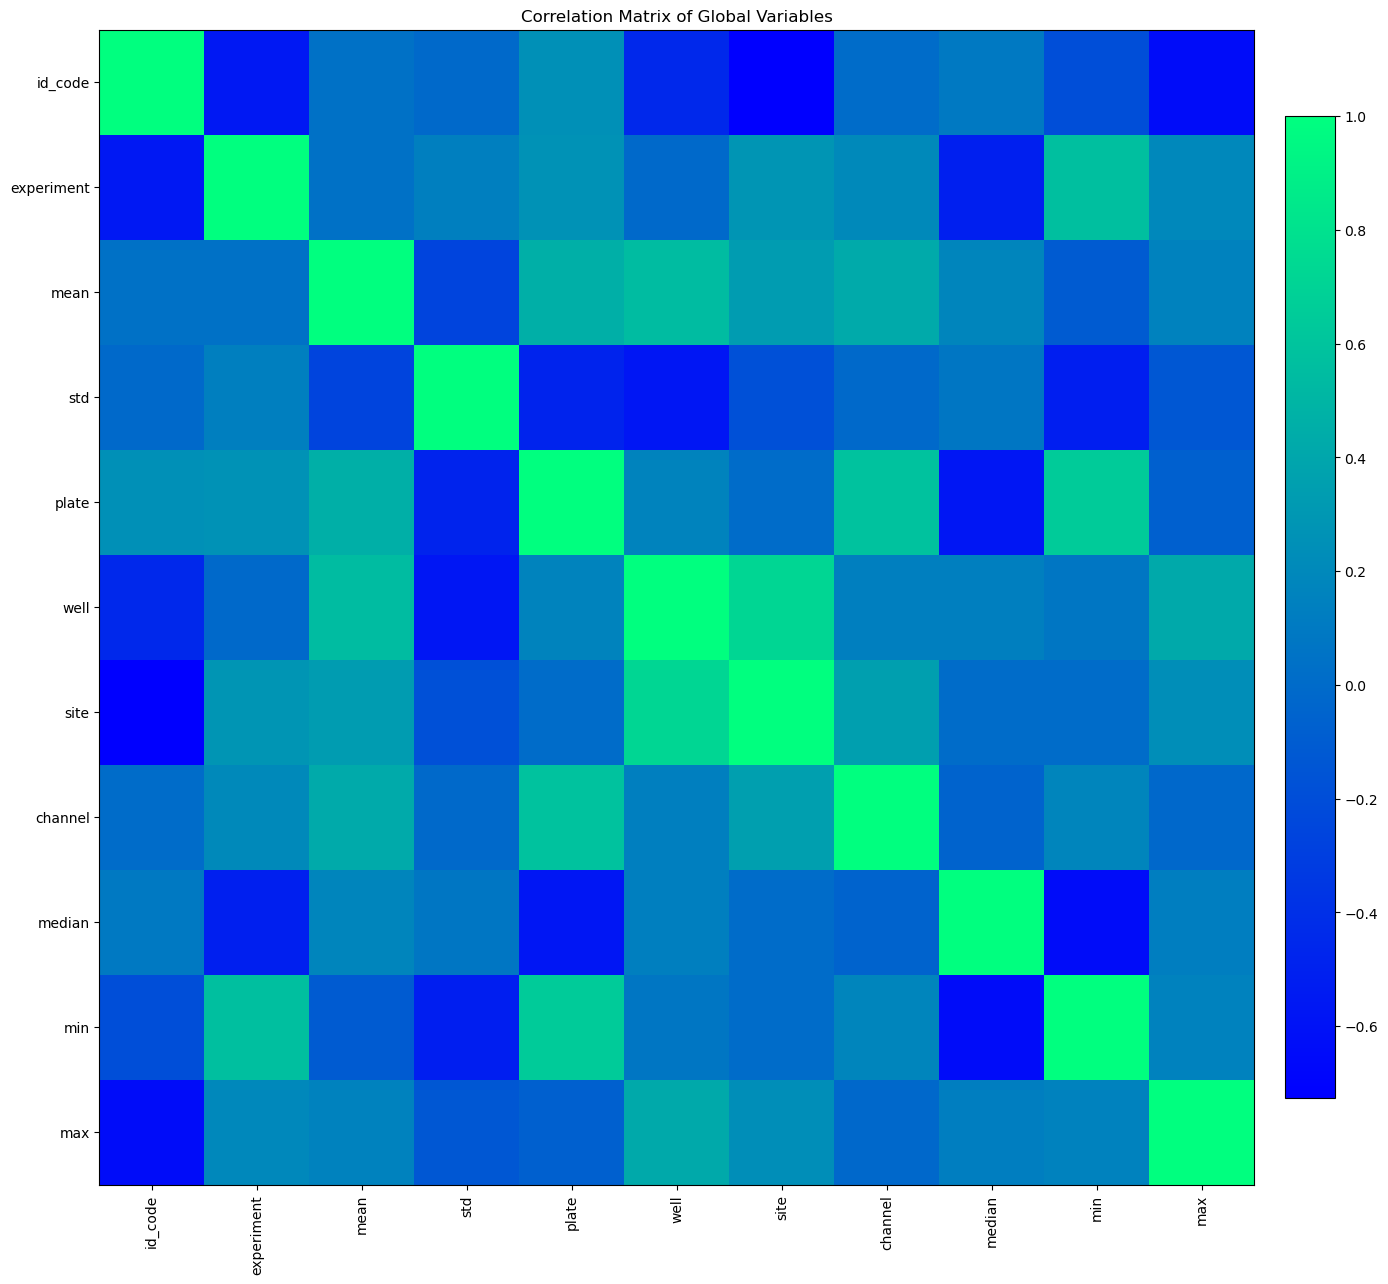

In [97]:
corr = df2.corr()
fig = plt.figure(1, figsize=(20,15))
plt.imshow(corr,cmap='winter')
labels = np.arange(len(df2.columns))
plt.xticks(labels,df2.columns,rotation=90)
plt.yticks(labels,df2.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

**A histogram for each numerical attribute**

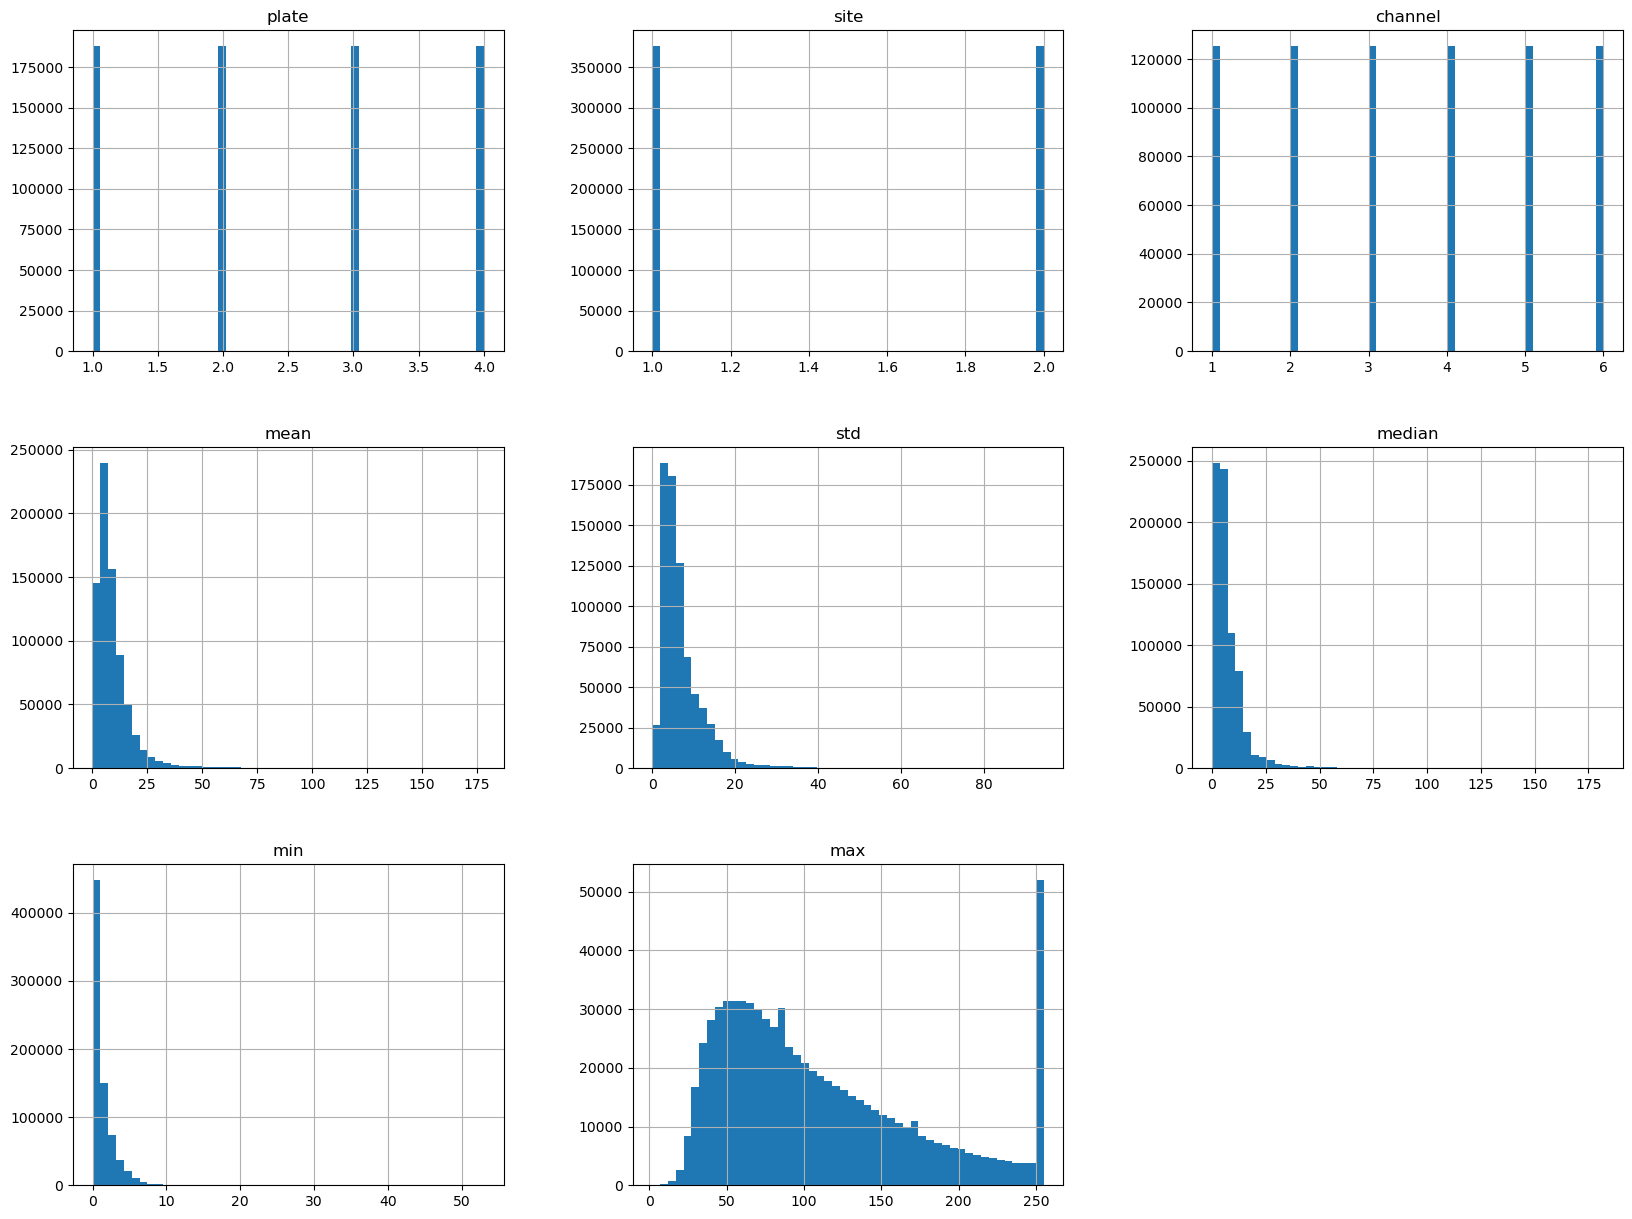

In [98]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

<Figure size 640x480 with 0 Axes>

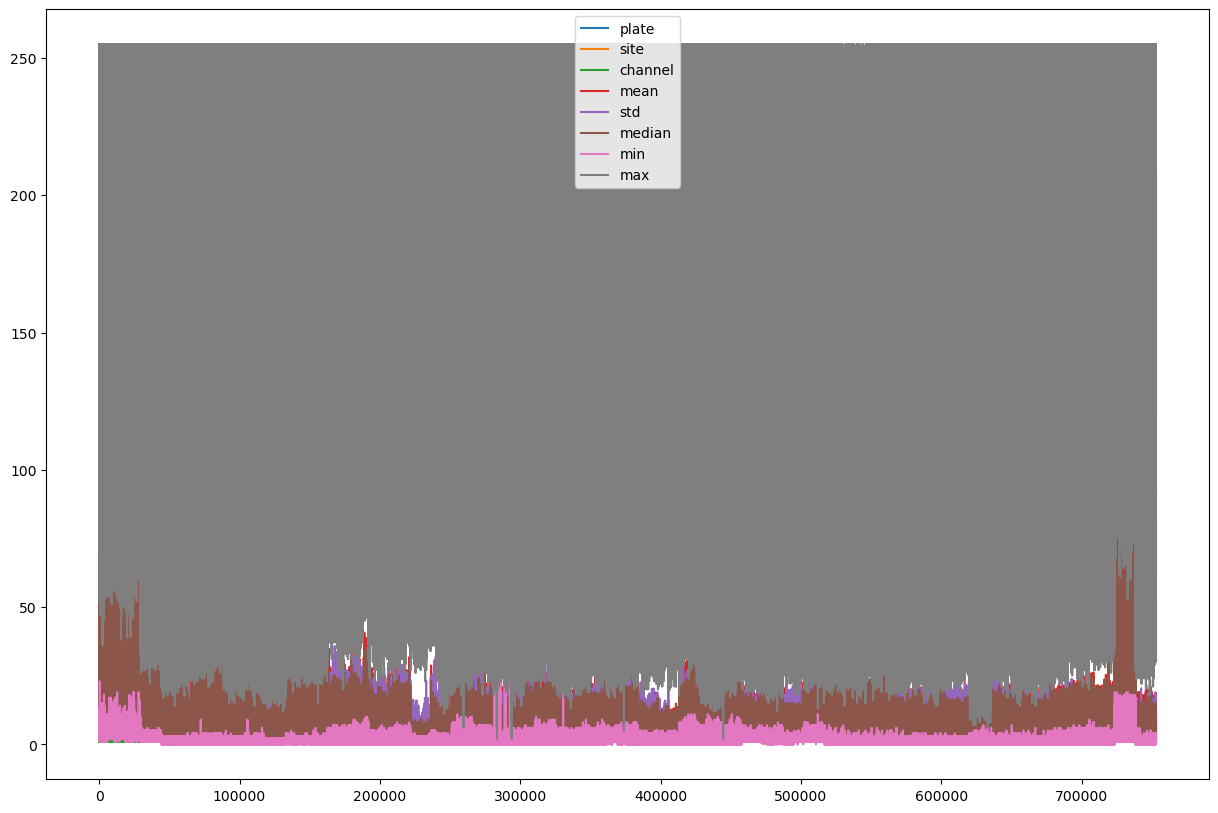

In [99]:
plt.figure(); df.plot(figsize=(15,10))

<Axes: >

<Figure size 640x480 with 0 Axes>

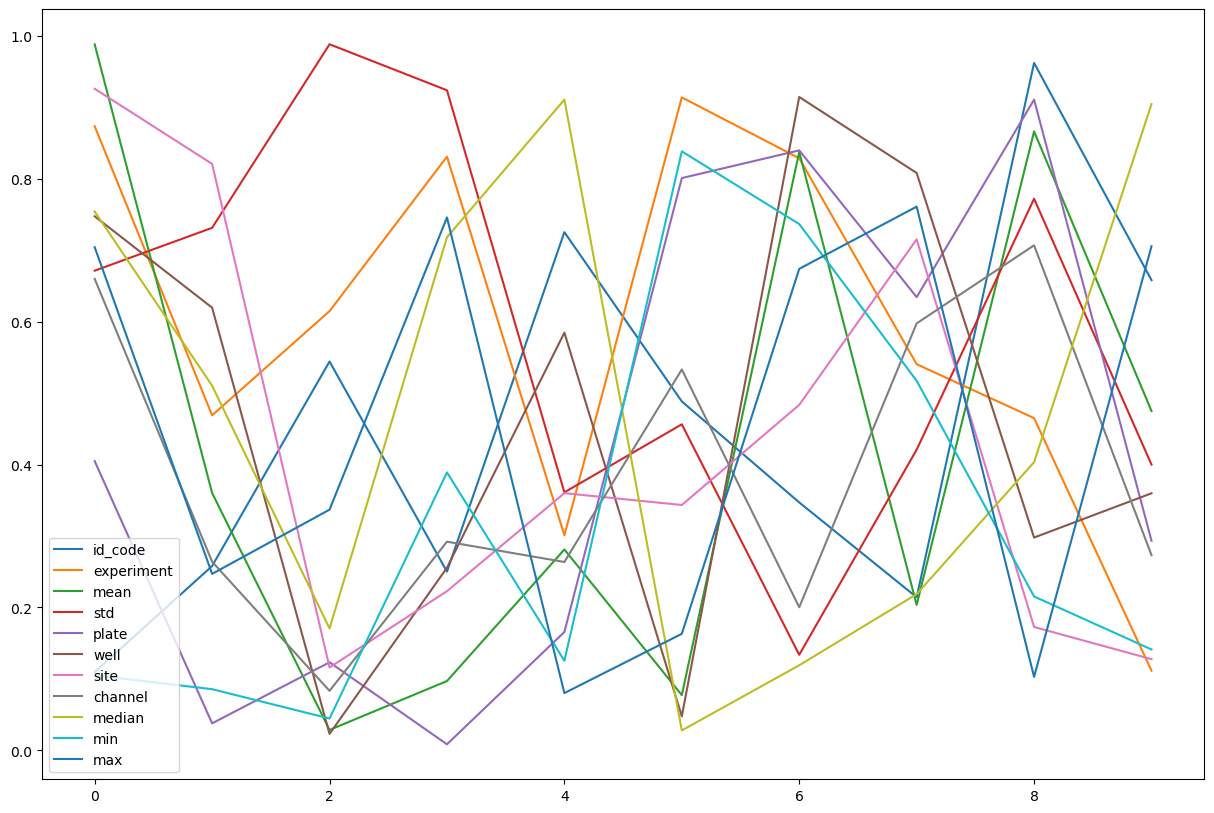

In [100]:
plt.figure(); df2.plot(figsize=(15,10))

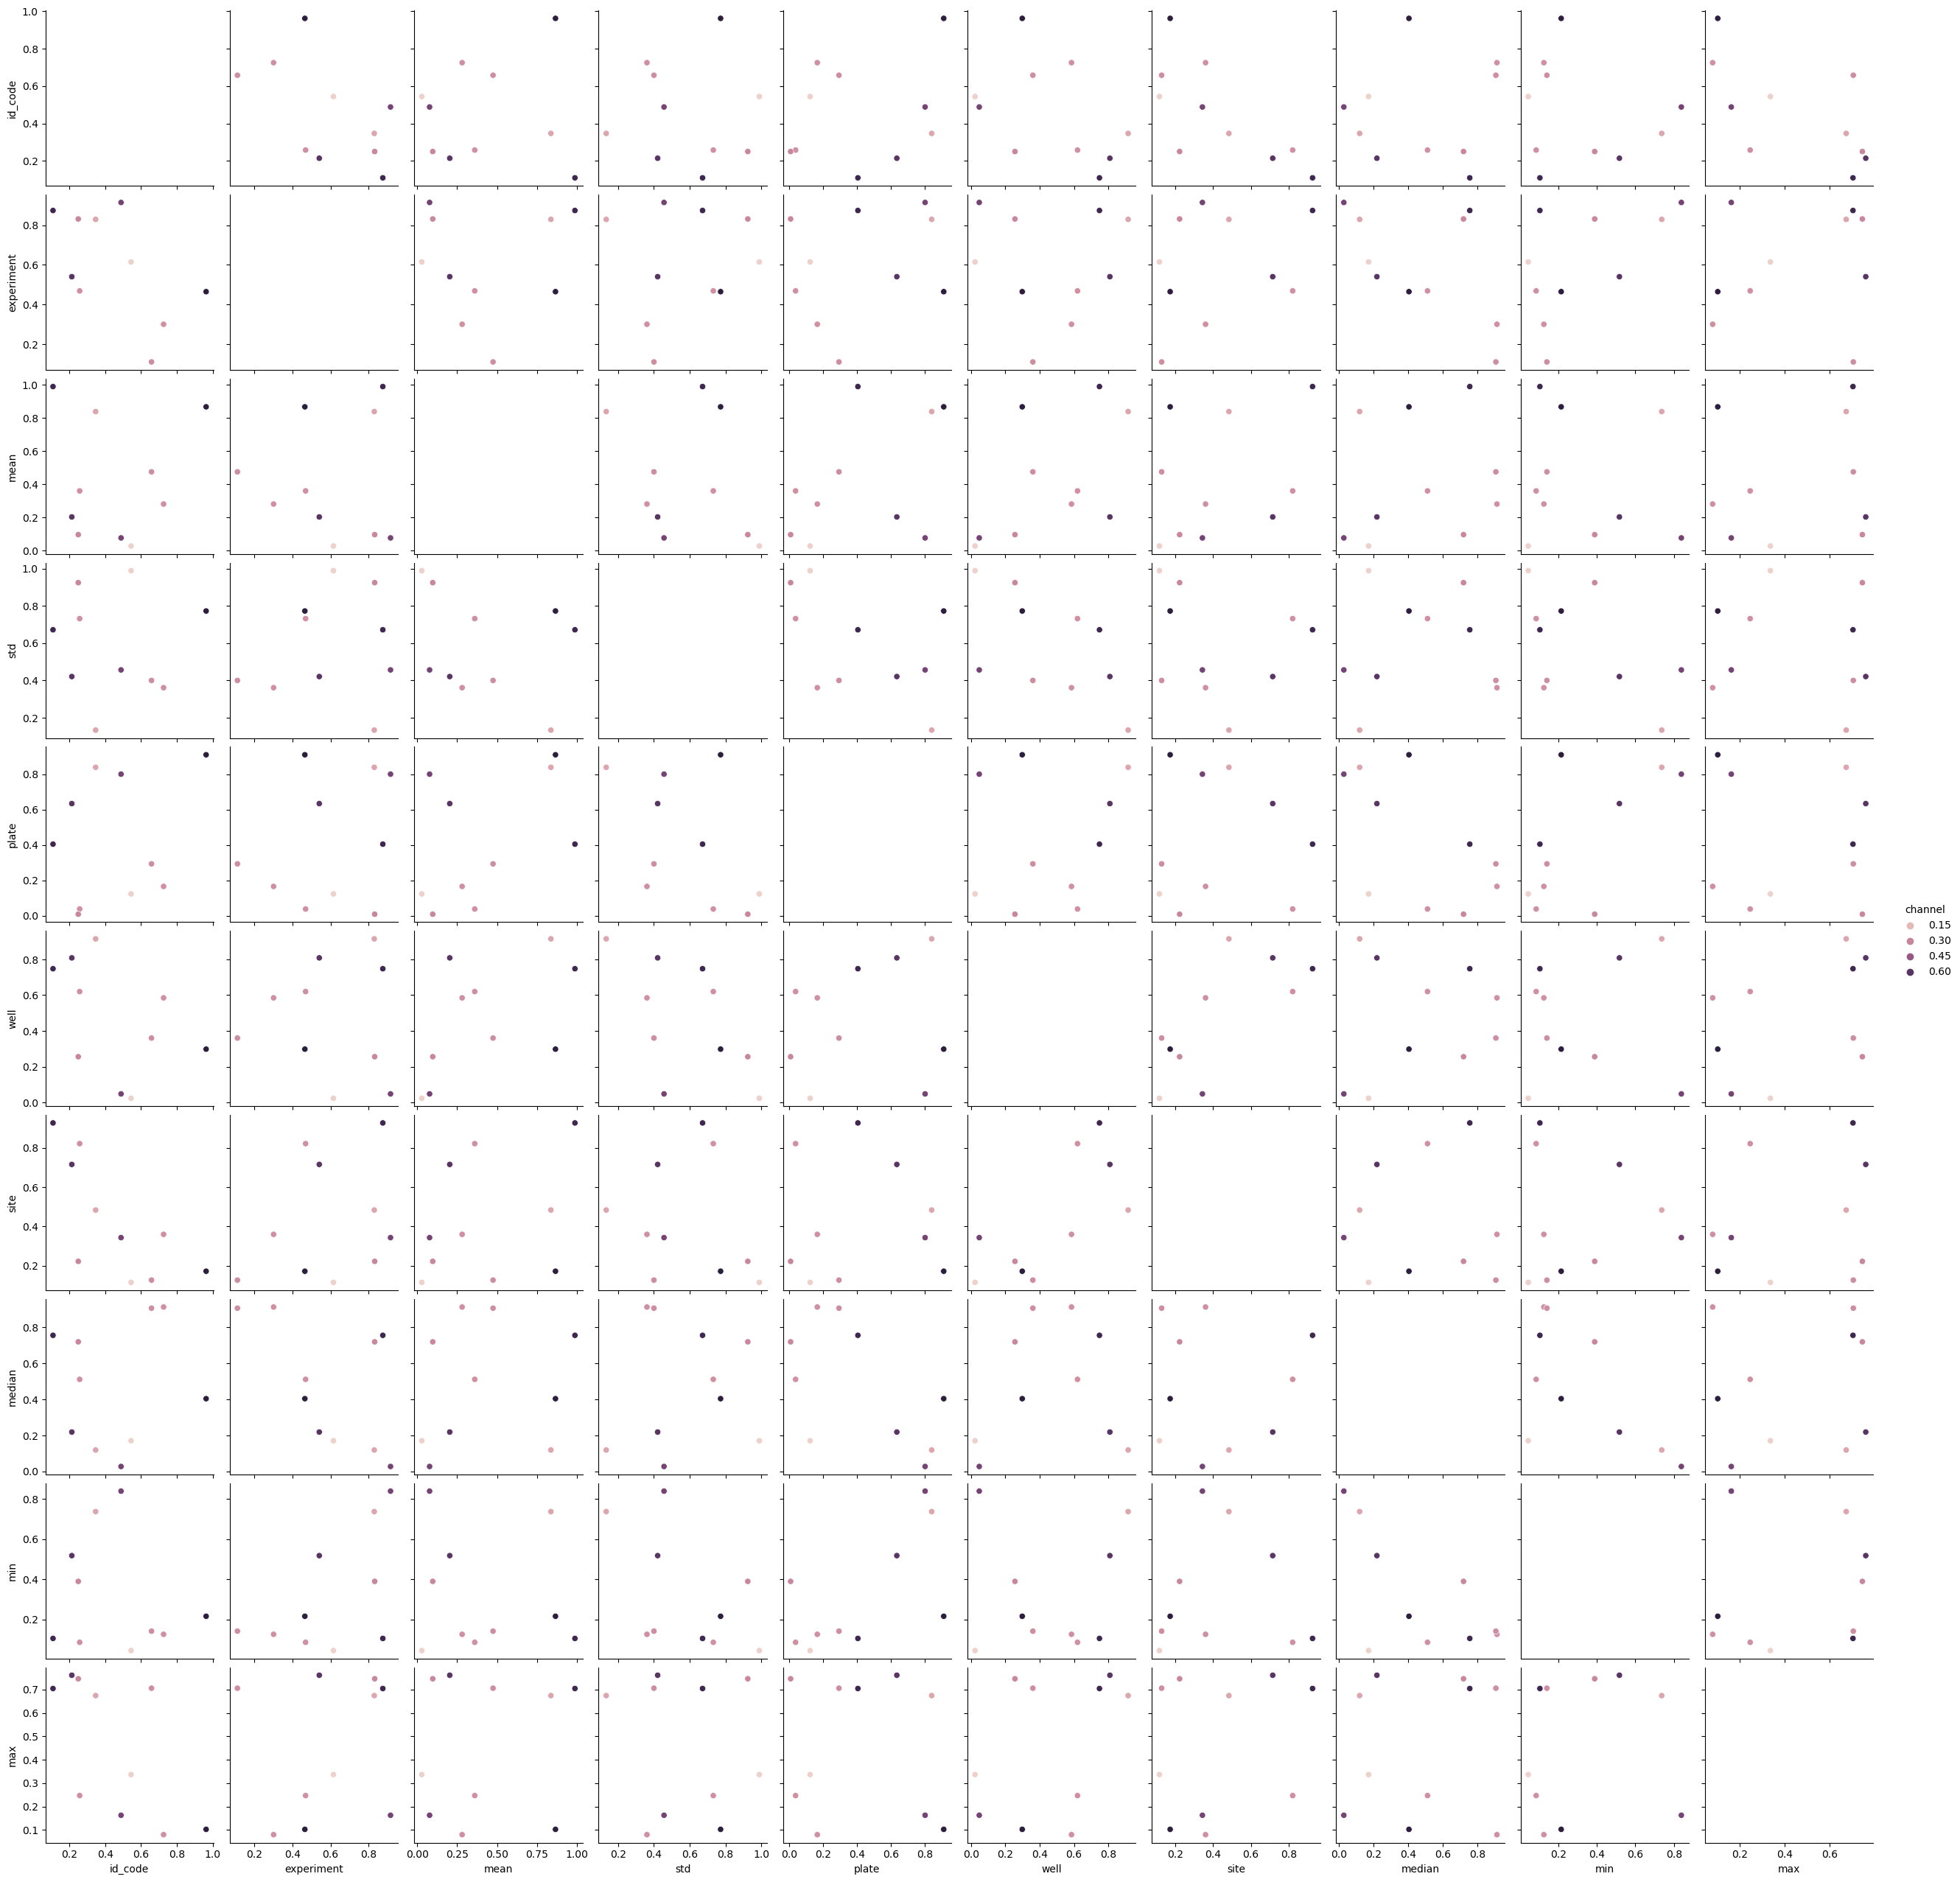

In [101]:
sns.pairplot(df2,hue='channel',height=2.6)

In [102]:
df.loc[0]

id_code       HEPG2_01_1_B02_1
experiment            HEPG2-01
plate                        1
well                       B02
site                         1
channel                      1
mean                 71.063782
std                   43.14624
median                    67.0
min                          7
max                        255
Name: 0, dtype: object

In [103]:
image = imread('../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png')
print('Type of the image : ' , type(image))

print('Shape of the image : {}'.format(image.shape))

print('Image Hight {}'.format(image.shape[0]))

print('Image Width {}'.format(image.shape[1]))

print('Dimension of Image {}'.format(image.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (512, 512)
Image Hight 512
Image Width 512
Dimension of Image 2


In [104]:
image = imread('../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png')
print('Image size {}'.format(image.size))

print('Maximum RGB value in this image {}'.format(image.max()))

print('Minimum RGB value in this image {}'.format(image.min()))

Image size 262144
Maximum RGB value in this image 111
Minimum RGB value in this image 2


In [105]:
df.shape

(753084, 11)

Text(0, 0.5, 'Count')

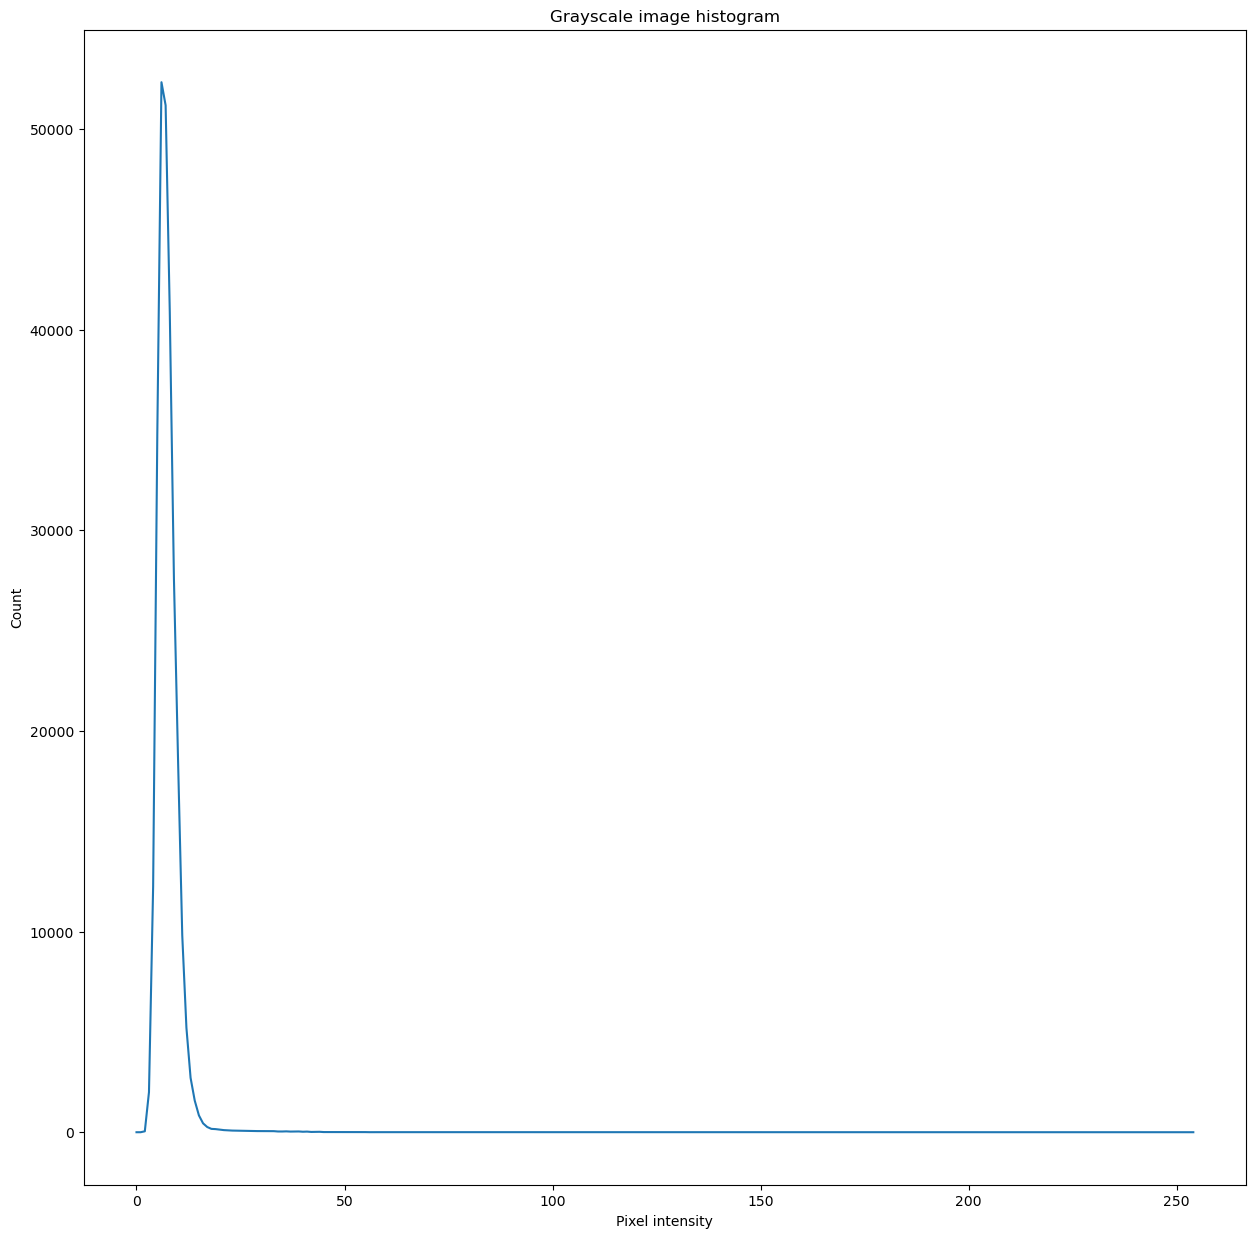

In [106]:
plt.figure(figsize=(15, 15))
grayscale = imread('../input/recursion-cellular-image-classification/test/HUVEC-21/Plate3/H05_s2_w3.png')
counts, vals = np.histogram(grayscale, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

In [107]:
df.size

8283924

In [108]:
df.isnull().sum()

id_code       0
experiment    0
plate         0
well          0
site          0
channel       0
mean          0
std           0
median        0
min           0
max           0
dtype: int64

In [109]:
# look at the last 5 rows
df.tail()

,id_code,experiment,plate,well,site,channel,mean,std,median,min,max
753079,U2OS_05_4_O23_2,U2OS-05,4,O23,2,2,12.229572,7.485257,11.0,2,105
753080,U2OS_05_4_O23_2,U2OS-05,4,O23,2,3,8.251598,3.597804,8.0,1,77
753081,U2OS_05_4_O23_2,U2OS-05,4,O23,2,4,7.443695,4.215806,7.0,1,61
753082,U2OS_05_4_O23_2,U2OS-05,4,O23,2,5,3.046192,2.233572,2.0,1,71
753083,U2OS_05_4_O23_2,U2OS-05,4,O23,2,6,6.712074,2.721073,6.0,1,53


In [110]:
df.describe()
print("*"*50)
df.info()
print("*"*50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753084 entries, 0 to 753083
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_code     753084 non-null  object 
 1   experiment  753084 non-null  object 
 2   plate       753084 non-null  int64  
 3   well        753084 non-null  object 
 4   site        753084 non-null  int64  
 5   channel     753084 non-null  int64  
 6   mean        753084 non-null  float64
 7   std         753084 non-null  float64
 8   median      753084 non-null  float64
 9   min         753084 non-null  int64  
 10  max         753084 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 63.2+ MB
**************************************************


In [111]:
df2

,id_code,experiment,mean,std,plate,well,site,channel,median,min,max
0,0.109554,0.873868,0.988485,0.671654,0.405008,0.747759,0.926379,0.660128,0.754476,0.104991,0.704495
1,0.258053,0.469127,0.360369,0.731631,0.037800,0.619868,0.821175,0.264115,0.510543,0.085605,0.247082
2,0.544457,0.615016,0.028562,0.988684,0.123256,0.023025,0.115977,0.083331,0.170624,0.044523,0.336998
3,0.250238,0.831268,0.097011,0.924312,0.008461,0.255637,0.222844,0.292151,0.718372,0.389191,0.746165
4,0.725591,0.301149,0.281259,0.361256,0.165694,0.584870,0.360106,0.263744,0.911230,0.125497,0.080162
5,0.488563,0.914287,0.077322,0.456503,0.801308,0.047630,0.343523,0.533297,0.027863,0.838770,0.163132
6,0.347131,0.829109,0.837872,0.133788,0.840125,0.914855,0.483731,0.200344,0.119099,0.736898,0.674238
7,0.214314,0.540698,0.203597,0.420982,0.634608,0.808459,0.715545,0.597827,0.218677,0.517485,0.761299
8,0.962558,0.465204,0.866592,0.772410,0.911144,0.297958,0.172705,0.707160,0.403543,0.215453,0.102853
9,0.658345,0.111533,0.475160,0.400124,0.293481,0.359939,0.127648,0.273264,0.904986,0.141222,0.705861
